# Deep Technical Analysis with Coinmarketcap.com Price History

In this notebook we well generate a 3 dimensional price tensor of coin history data. The price tensor will be of dimensions mxnxf. Where m is number of coins, n is number of days, and f is number of features.

The architecture will be an implementation of the mini-machine topology, using CNN as outlined in [this paper](https://arxiv.org/pdf/1706.10059.pdf)

### Creating The Price Tensor

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from Scrapers.Coinmarketcap.coinmarketcap import CoinMarketcap
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as plt

DAY_BLK = 90 # Number of days of input
DATA_START, DATA_END = '20140101', '20180228' # Period of Data to A

#### Use the CoinMarketcap module to load price history data

In [2]:
# Get a list of coin objects for the top 100 coins from coinmarketcap.com
cmk = CoinMarketcap()
coins = cmk.coins()


In [3]:
# Change 'read_history' to 'get_history' to refresh your local cache
start, end = '20140101', '20180228'
price_tensor = {coin.name:coin.read_history(start=start,end=end) for coin in coins}
price_tensor = pd.Panel(price_tensor).drop(['Unnamed: 0'], axis=2)
price_tensor

<class 'pandas.core.panel.Panel'>
Dimensions: 100 (items) x 1520 (major_axis) x 7 (minor_axis)
Items axis: 0x to aelf
Major_axis axis: 0 to 1519
Minor_axis axis: Date to Market Cap

In [4]:
#Examine a coin data plane
price_tensor['Bitcoin']

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Feb 28, 2018",10687.2,11089.8,10393.1,10397.9,6936190000,180510000000
1,"Feb 27, 2018",10393.9,10878.5,10246.1,10725.6,6966180000,175536000000
2,"Feb 26, 2018",9669.43,10475,9501.73,10366.7,7287690000,163283000000
3,"Feb 25, 2018",9796.42,9923.22,9407.06,9664.73,5706940000,165407000000
4,"Feb 24, 2018",10287.7,10597.2,9546.97,9813.07,6917930000,173682000000
5,"Feb 23, 2018",9937.07,10487.3,9734.56,10301.1,7739500000,167746000000
6,"Feb 22, 2018",10660.4,11039.1,9939.09,10005,8040080000,179936000000
7,"Feb 21, 2018",11372.2,11418.5,10479.1,10690.4,9405340000,191927000000
8,"Feb 20, 2018",11231.8,11958.5,11231.8,11403.7,9926540000,189536000000
9,"Feb 19, 2018",10552.6,11273.8,10513.2,11225.3,7652090000,178055000000


#### Investigate missing data

In [5]:
price_tensor.isna().sum()

,0x,Aeternity,Aion,Ardor,Ark,Augur,Bancor,Basic Attenti...,Binance Coin,BitShares,...,Verge,Veritaseum,Vertcoin,Waltonchain,Waves,ZClassic,ZCoin,Zcash,Zilliqa,aelf
Date,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450
Open,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450
High,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450
Low,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450
Close,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450
Volume,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450
Market Cap,1323,1247,1386,1002,1176,764,1264,1247,1301,201,...,297,1254,19,1334,883,1044,1009,1032,1485,1450


In [6]:
price_tensor.shape

(100, 1520, 7)

In [7]:
# Some missing values are encoded with '-'
price_tensor = price_tensor.replace('-', np.nan)

/home/shawn/.virtualenvs/733Project/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help automate this conversion.

  


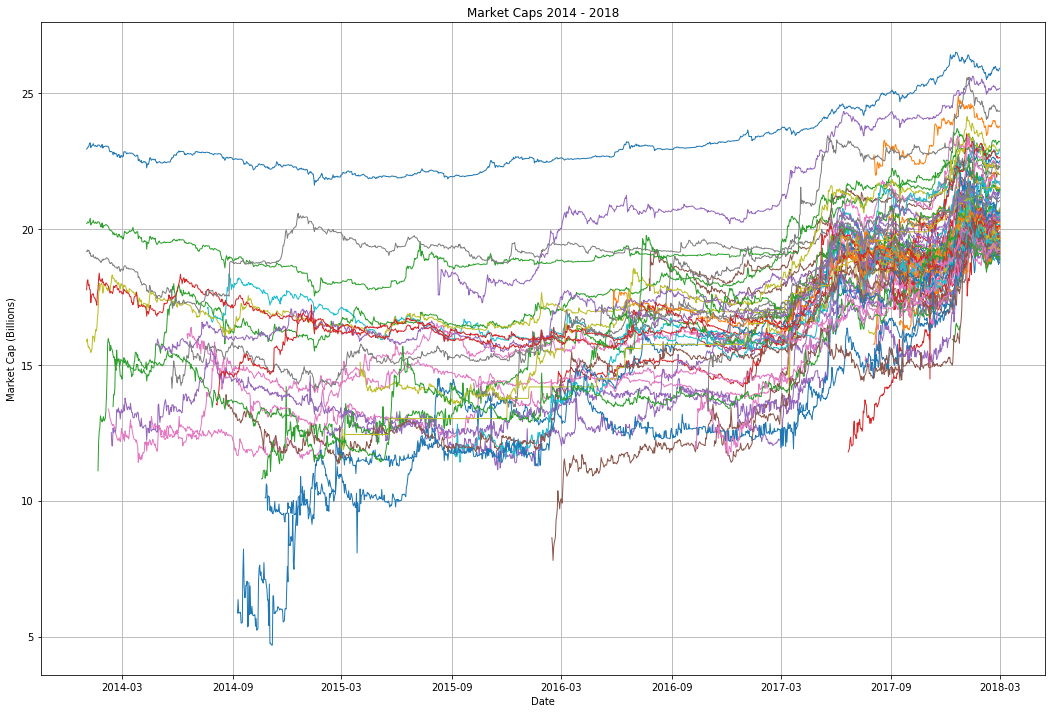

In [8]:
plt.clf()
plt.figure(figsize=(18,12))
x = pd.to_datetime(price_tensor['Bitcoin']['Date'])
for coin in price_tensor.items:
    y = np.log(pd.to_numeric(price_tensor[coin]['Market Cap']))
    plt.plot(x, y, linewidth=1, label=coin)

plt.xlabel('Date')
plt.ylabel('Market Cap (Billions)')
plt.title("Market Caps 2014 - 2018")
plt.grid(True)

#### Fill Missing Values

In [9]:
# Date column is the same for every coin, copy from Bitcoin which we know has all its data
for coin in price_tensor:
    price_tensor[coin]['Date'] = price_tensor['Bitcoin']['Date']

# price_tensor = price_tensor.fillna(1)
price_tensor = price_tensor.ffill()

# Check to see if any null remain
price_tensor.isna().sum()


,0x,Aeternity,Aion,Ardor,Ark,Augur,Bancor,Basic Attenti...,Binance Coin,BitShares,...,Verge,Veritaseum,Vertcoin,Waltonchain,Waves,ZClassic,ZCoin,Zcash,Zilliqa,aelf
Date,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Open,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
High,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Low,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Close,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Volume,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Market Cap,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Plotting All Marketcaps

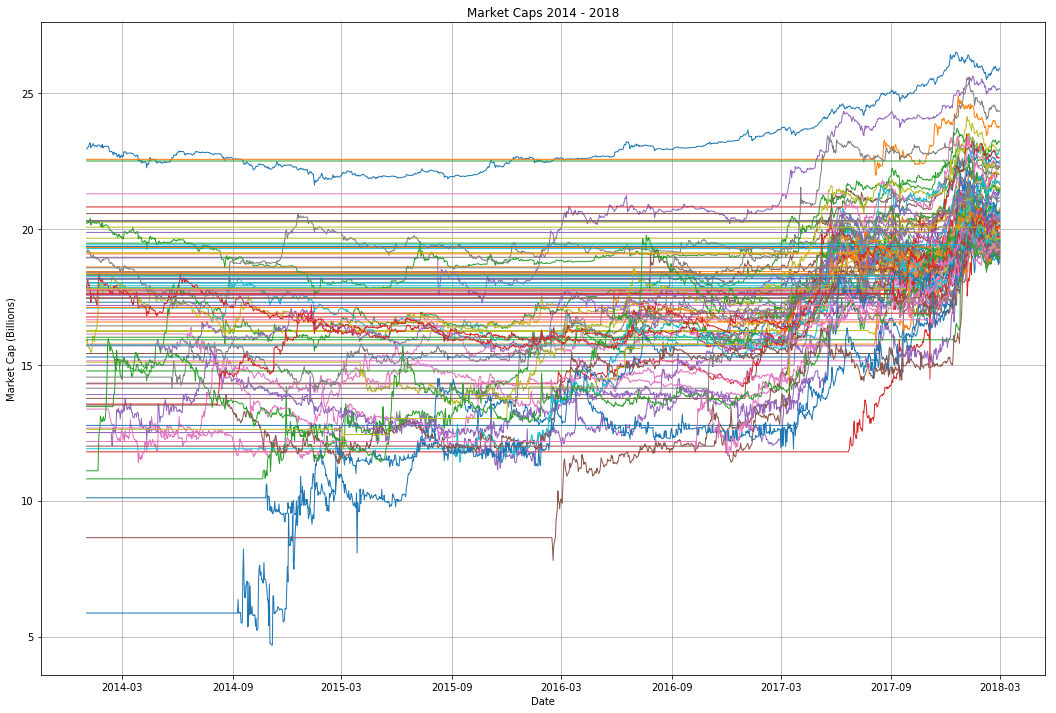

In [10]:
plt.clf()
plt.figure(figsize=(18,12))
x = pd.to_datetime(price_tensor['Bitcoin']['Date'])
for coin in price_tensor.items:
    y = np.log(pd.to_numeric(price_tensor[coin]['Market Cap']))
    plt.plot(x, y, linewidth=1, label=coin)

plt.xlabel('Date')
plt.ylabel('Market Cap (Billions)')
plt.title("Market Caps 2014 - 2018")
plt.grid(True)

### Convert date to two features: Day of Year, and Month

In [132]:
first_date = pd.to_datetime(price_tensor['Bitcoin']['Date']).min().date()

doy = pd.to_datetime(price_tensor['Bitcoin']['Date']).apply(lambda x: x.dayofyear)
doy_plane = np.tile(doy, 100)
doy_plane = doy_plane.reshape(100, len(doy_plane)//100)

month = pd.to_datetime(price_tensor['Bitcoin']['Date']).apply(lambda x: x.month)
month_plane = np.tile(month, 100)
month_plane = month_plane.reshape(100, len(month_plane)//100)

pt = np.dstack([price_tensor, doy_plane, month_plane])
pt = xr.DataArray(pt, dims=['coins', 'days', 'features'])
# drop date
pt = pt[:,:,1:]
# Sort by date
pt = xr.DataArray(np.flip(pt.values, 1), dims=['coins', 'days', 'features']) 

In [133]:
# Normalize Volume, doy, and month
for i in [4,6,7]:
    pt[:,:,i] = (pt[:,:,i] - pt[:,:,i].min()) / (pt[:,:,i].max() - pt[:,:,i].min())
    
# Drop Marketcap for now
pt = pt[:,:,]

In [134]:
pt[0,0,:]

<xarray.DataArray (features: 8)>
array([0.111725, 0.280031, 0.10396199999999997, 0.224399,
       0.00021947996929646112, 67034800.0, 0.0, 0.0], dtype=object)
Dimensions without coordinates: features

## Now for some Deep Learning
We will now use convulutional networks to evaluate coins and predict price movement

In [76]:
from DeepLearning.Evaluator import CNN
from datetime import date

evaluator = CNN(pred_type='binary')
model = evaluator.model
train_start_date = date(2017,1,1)
train_end_date   = date(2017,4,1)
train_X, train_y = evaluator.processXY(pt, train_start_date, train_end_date, first_date)

In [77]:
#train_X[0][0].shape
train_example = train_X[0,:,:]
y_example = train_y[0]

In [78]:
y_example

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0])

In [79]:
out1 = model.predict(np.array([train_example]))
out1.shape
out1

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1.]], dtype=float32)

In [99]:
w1 = model.get_weights()
model.fit(np.array([train_example]), np.array([y_example])+10)
w2 = model.get_weights()
print((w1[0] - w2[0]).sum()
(w1[1] - w2[1]).sum()
(w1[2] - w2[2]).sum()
(w1[3] - w2[3]).sum()
(w1[4] - w2[4]).sum()

Epoch 1/1
1/1 [==============================] - 0s 4ms/step - loss: -148.4236 - acc: 0.0000e+00


0.0

In [18]:
model.fit(train_X, train_y, epochs=10, batch_size=16)
#model.get_weight()

Epoch 1/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 2/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 3/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 4/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 5/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 6/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 7/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 8/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 9/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778
Epoch 10/10
90/90 [==============================] - 0s 2ms/step - loss: 0.0100 - acc: 0.0778


In [19]:
import pandas as pd
t = pd.Panel(train_X[0])
t[0]

,0,1,2,3,4,5,6,7
0,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,1,1
1,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,2,1
2,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,3,1
3,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,4,1
4,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,5,1
5,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,6,1
6,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,7,1
7,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,8,1
8,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,9,1
9,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,10,1


In [20]:
t[0]

,0,1,2,3,4,5,6,7
0,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,1,1
1,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,2,1
2,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,3,1
3,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,4,1
4,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,5,1
5,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,6,1
6,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,7,1
7,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,8,1
8,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,9,1
9,-0.502115,0.247916,-0.536709,0,5.2326e+06,6.70348e+07,10,1


In [21]:
print(train_X.shape)
print(train_y.shape)

#np.array(train_X).shape
#np.stack([np.stack(x) for x in train_X]).shape

(90, 100, 60, 8)
(90, 100)


In [22]:
train_y[0][1]

0.00965129240270655

In [23]:
train_y[:,0,:]

IndexError: too many indices for array

In [ ]:
x = t[:,0]
y = t[:,1]
print(x[0].shape)

In [ ]:
a = np.array([1,2])
b = np.array([2,3])
a.shape
c = np.array([a,b])
c.shape